# Pregunta 3

### Se tiene una partícula de masa m = 1 en un campo gravitacional $\vec{g} = −9.8 \hat{j}$ en una caja con piso en forma de v a un ángulo $\alpha$, de lado $L=10$ m y $d=3$ m. Realice los ejercicios con valores de $\alpha=\pi/6 \ $ y $ \ \alpha = \pi/10$.


### a)Realice una simulación con condición inicial tal que la posición inicial es sobre la rampa a un tercio de la distancia de la pared vertical izquierda y el vértice inferior de la caja, y se dispara con velocidad $\vert \vec{v} \vert = 1$ hacia la derecha con ángulos $\alpha$ sobre la horizontal $\alpha$, $2\alpha$ y $3\alpha$. (Para que la simulación sea válida, la partícula debe rebotar al menos 20 veces con alguna parte de la caja).

In [43]:
from pylab import*
from numpy import*
%matplotlib inline

In [115]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    #el parámetro args está evaluándose en la segunda coordenada de la ecuación diferencial
    #éste escalar será la fricción que estamos añadiendo a la función.
    
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10.
    #codigo adicional para hacer que cuando se acerque al punto 
    #de rebote los pasos sean más pequeños y nunca sobrepase la barrera.
    
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    
    if args==0:
        for i in xrange(len(tiempos)-1): 
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h) 
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h) 
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h) 
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) 
            
    else:
        for i in xrange(len(tiempos)-1): 
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args) 
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args) 
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args) 
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) 
            
    return tiempos,sol

Las ecuaciones para una pelota que rebote en una caja con las características anteriores son:

$$

$$

In [44]:
#ángulos de la caja con el piso
alpha1,alpha2=pi/6,pi/10

In [45]:
#Condiciones iniciales
angulo=alpha1
x,y=5./3,tan(angulo)*(5-(5./3))
a=random.randint(0, 2*pi)
x_v,y_v=cos(angulo),sin(angulo)

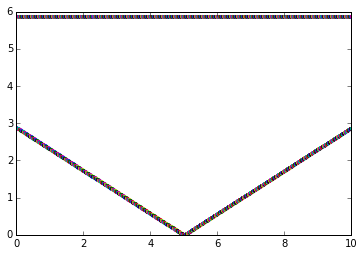

In [114]:
#para dibujar la caja
ptos=arange(0,10,0.01)
def techo(z):
    return (tan(angulo)*5+3)
def piso(z):
    if 0<= z <=5:
        return (-tan(angulo)*z)+(tan(angulo)*5)
    else:
        return (tan(angulo)*z)-(tan(angulo)*5)
for n in ptos:
    plot(n,piso(n),'.')
    plot(n,techo(n),'.')
show()

TypeError: unsupported operand type(s) for +: 'Line2D' and 'float'

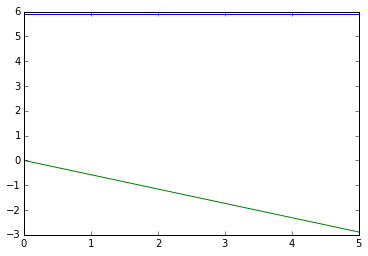

In [108]:
n=linspace(0,5)
plot(n,tan(n*0+angulo)*5+3)
plot(n,-tan(angulo)*n)+(tan(angulo)*5)
m=linspace(5,10)
plot(m,tan(m*0+angulo)*5+3)
plot(m,-tan(angulo)*m)+(tan(angulo)*5)

In [94]:
n=arange(0,5,0.01)
plot(n,tan(n))(#angulo)*5+3)
#plot(n,-tan(angulo)*n)+(tan(angulo)*5)
show()
#m=arange(5,10,0.01)
#plot(m,tan(angulo)*5+3)
#plot(m,tan(angulo)*z)-(tan(angulo)*5)

SyntaxError: invalid syntax (<ipython-input-94-df7406294d8d>, line 7)

### b) Introduzca algún modelo de fricción y compare las trayectorias con el inciso anterior.

### c) Dibuje el espacio fase px , x y py , y cuando no hay fricción y la partícula es lanzada hacia la derecha a un ángulo $\alpha$ y vertical hacia arriba. Tome en cuenta el número necesario de rebotes para que la simulación pueda barrer el espacio fase de manera representativa.